AUTOREGRESSIVE INTEGRATED MOVING AVERAGE MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df=pd.read_csv('sales.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df["date"]=pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index("date", inplace=True)

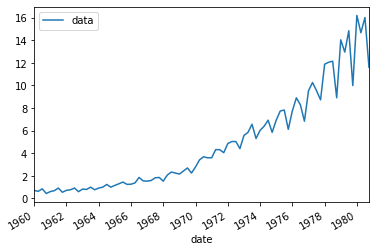

In [4]:
df.plot()

In [5]:
def stationarityCheck(var):
    check = adfuller(var)
    print('ADF stat : %f' % check[0])
    print('p-value : %f' % check[1])
    print('Critical Values :')
    for key, val in check[4].items():
        print('%s : %.3f' % (key, val))

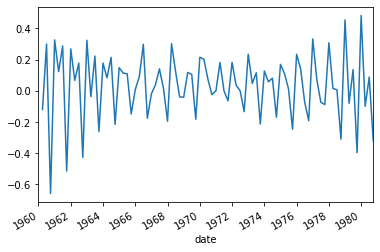

In [6]:
df['LDiff']=(np.log(df['data'])).diff()
df['LDiff'].plot()

In [7]:
df.dropna(inplace=True)
stationarityCheck(df['LDiff'].values)

ADF stat : -4.317044
p-value : 0.000415
Critical Values :
1% : -3.518
5% : -2.900
10% : -2.587


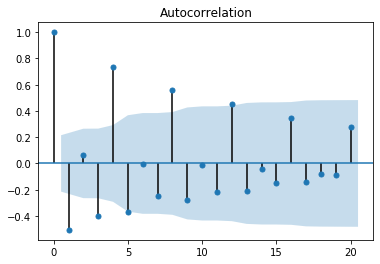

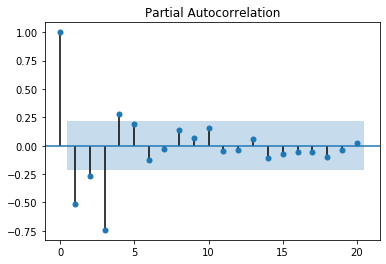

In [8]:
plot_acf(df['LDiff']);
plot_pacf(df['LDiff']);

In [9]:
period=12
X = df['LDiff']
train = X[1:len(X)-period]
test = X[len(X)-period:]

In [10]:
model = ARIMA(X, order=(3,1,8))
model_fit = model.fit(transparams=False)
predictions = model_fit.predict(start=len(train)+1,end=len(train) + len(test),dynamic=False)
model_fit.summary()

C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\m\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\m\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\m\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.LDiff   No. Observations:                   82
Model:                 ARIMA(3, 1, 8)   Log Likelihood                  76.569
Method:                       css-mle   S.D. of innovations                nan
Date:                Mon, 05 Apr 2021   AIC                           -127.137
Time:                        14:34:10   BIC                            -95.850
Sample:                             1   HQIC                          -114.576
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.001      0.307      0.759      -0.002       0.003
ar.L1.D.LDiff    -0.8785      0.054    -16.336      0.000      -0.984      -0.773
ar.L2.D.LDiff    -0.9308      0.093     -9.976      0.000      -1.114      -0.748
ar.L3.D.LDiff    -0.8581        nan        nan        nan         nan         nan
ma.L1.D.LDiff    -0.7214      0.421     -1.714      0.086      -1.546       0.103
ma.L2.D.LDiff     0.3075        nan        nan        nan         nan         nan
ma.L3.D.LDiff    -0.3210      0.055     -5.820      0.000      -0.429      -0.213
ma.L4.D.LDiff    -0.0391      0.072     -0.541      0.589      -0.181       0.103
ma.L5.D.LDiff    -0.0847      0.203     -0.418      0.676      -0.482       0.312
ma.L6.D.LDiff     0.1518      0.109      1.395      0.163      -0.061       0.365
ma.L7.D.LDiff     0.2028      0.154      1.318      0.187      -0.099       0.504
ma.L8.D.LDiff    -0.1128      0.455     -0.248      0.804      -1.005       0.779
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0122           -1.0250j            1.0250           -0.2481
AR.2            0.0122           +1.0250j            1.0250            0.2481
AR.3           -1.1091           -0.0000j            1.1091           -0.5000
MA.1           -1.4823           -0.0000j            1.4823           -0.5000
MA.2           -0.7597           -1.0024j            1.2578           -0.3532
MA.3           -0.7597           +1.0024j            1.2578            0.3532
MA.4            0.1889           -1.0890j            1.1053           -0.2227
MA.5            0.1889           +1.0890j            1.1053            0.2227
MA.6            1.1469           -0.3726j            1.2059           -0.0500
MA.7            1.1469           +0.3726j            1.2059            0.0500
MA.8            2.1284           -0.0000j            2.1284           -0.0000
-----------------------------------------------------------------------------
"""

In [11]:
compare = pd.concat([predictions.rename('LDiffrenced Predictions'),
                     df['data'].rename('Actual'),
                     df['LDiff'].rename('Log Difference')], axis=1)

In [12]:
compare['Predictions'] = np.exp((compare['LDiffrenced Predictions'] + (np.log(compare['Actual'])).shift(1)))

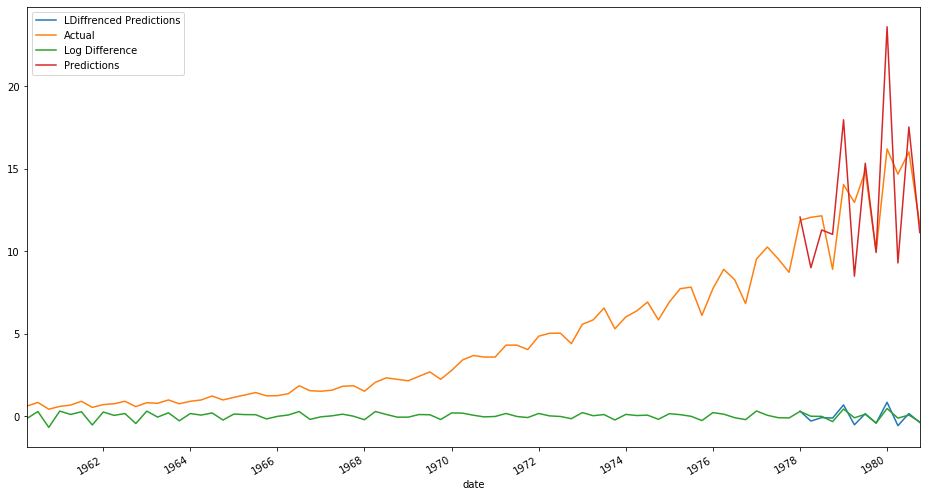

In [13]:
compare.plot(figsize=(16, 9))

In [14]:
rmse=((compare['Predictions']-compare['Actual'])**2).mean()**0.5
rmse

3.369326520054697

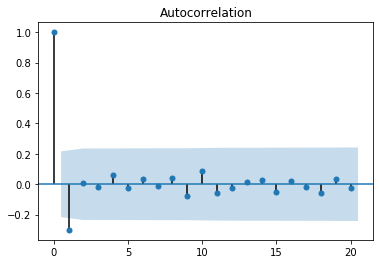

In [15]:
plot_acf(model_fit.resid);

------------------------------------------

Different difference | Different lags | Upper & Lower Bound | Ljung–Box test on residuals | Move forward

------------------------------------------